<b>Assignment 4<b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Loading Pokémon dataset... Gotta catch 'em all!")
df = pd.read_csv('pokemon_data.csv')

Loading Pokémon dataset... Gotta catch 'em all!


In [4]:
def extract_stats(text):
    result = {}
    for pair in text.split(', '):
        key, value = pair.split('=')
        result[key] = int(value)
    return pd.Series(result)

stats_df = df['stats'].apply(extract_stats)
df = pd.concat([df.drop('stats', axis=1), stats_df], axis=1)

In [6]:
print("Splitting primary and secondary types")
df[['type_1','type_2']] = df['types'].str.split(',', n=1, expand=True)
df['type_2'] = df['type_2'].str.strip()
df.drop_duplicates(inplace=True)

Splitting primary and secondary types


In [7]:
print('Pokémon count and attributes:', df.shape)
print('\nMissing values:')
print(df.isna().sum())
print('\nOverall summary:')
print(df.describe())

Pokémon count and attributes: (1302, 16)

Missing values:
id                   0
name                 0
base_experience      0
height               0
weight               0
types                0
abilities            0
moves               34
hp                   0
attack               0
defense              0
special-attack       0
special-defense      0
speed                0
type_1               0
type_2             576
dtype: int64

Overall summary:
                 id  base_experience       height        weight           hp  \
count   1302.000000      1302.000000  1302.000000   1302.000000  1302.000000   
mean    2560.927803       161.943932    20.467742    980.863287    71.314900   
std     3949.887748        82.532554    54.180316   1972.645170    26.868926   
min        1.000000        36.000000     1.000000      0.000000     1.000000   
25%      326.250000        71.000000     5.000000     89.250000    54.000000   
50%      651.500000       165.000000    10.000000    315.500000

<h2>We used box plots and histograms to visually detect outliers. For example, some Pokémon show extreme values in weight and attack.
</h2>

Text(0.5, 1.0, 'HP Distribution of Pokémon')

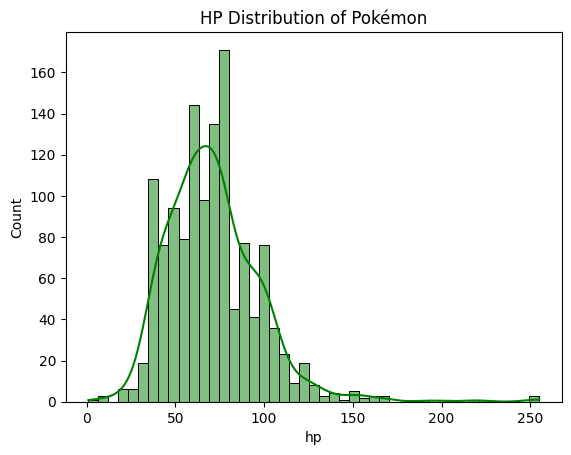

In [8]:
plt.figure()
sns.histplot(df['hp'], kde=True, color='green')
plt.title('HP Distribution of Pokémon')

C:\Users\chand\AppData\Local\Temp\ipykernel_3276\1657428527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type_1', data=df, palette='cool')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'grass'),
  Text(1, 0, 'fire'),
  Text(2, 0, 'water'),
  Text(3, 0, 'bug'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'poison'),
  Text(6, 0, 'electric'),
  Text(7, 0, 'ground'),
  Text(8, 0, 'fairy'),
  Text(9, 0, 'fighting'),
  Text(10, 0, 'psychic'),
  Text(11, 0, 'rock'),
  Text(12, 0, 'ghost'),
  Text(13, 0, 'ice'),
  Text(14, 0, 'dragon'),
  Text(15, 0, 'dark'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'flying')])

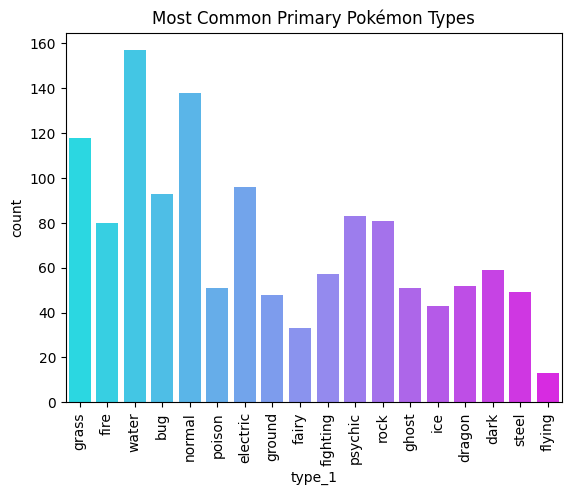

In [13]:
plt.figure()
sns.countplot(x='type_1', data=df, palette='cool')
plt.title('Most Common Primary Pokémon Types')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'grass'),
  Text(1, 0, 'fire'),
  Text(2, 0, 'water'),
  Text(3, 0, 'bug'),
  Text(4, 0, 'normal'),
  Text(5, 0, 'poison'),
  Text(6, 0, 'electric'),
  Text(7, 0, 'ground'),
  Text(8, 0, 'fairy'),
  Text(9, 0, 'fighting'),
  Text(10, 0, 'psychic'),
  Text(11, 0, 'rock'),
  Text(12, 0, 'ghost'),
  Text(13, 0, 'ice'),
  Text(14, 0, 'dragon'),
  Text(15, 0, 'dark'),
  Text(16, 0, 'steel'),
  Text(17, 0, 'flying')])

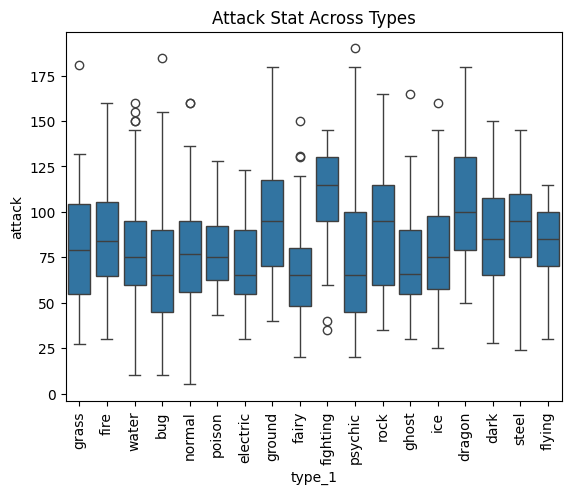

In [14]:
plt.figure()
sns.boxplot(x='type_1', y='attack', data=df)
plt.title('Attack Stat Across Types')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Weight vs Attack Power')

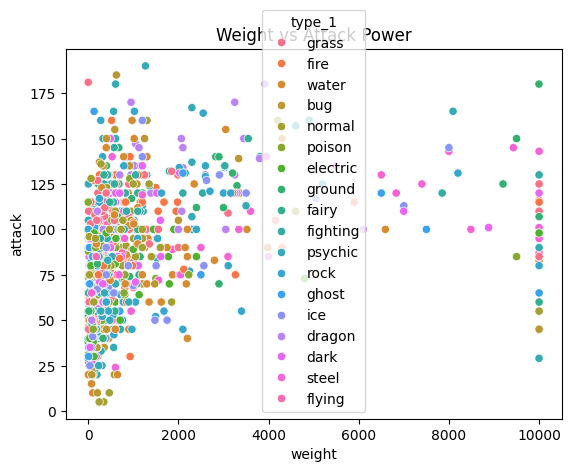

In [11]:
plt.figure()
sns.scatterplot(x='weight', y='attack', data=df, hue='type_1')
plt.title('Weight vs Attack Power')

Text(0.5, 1.0, 'Stat Correlation Matrix')

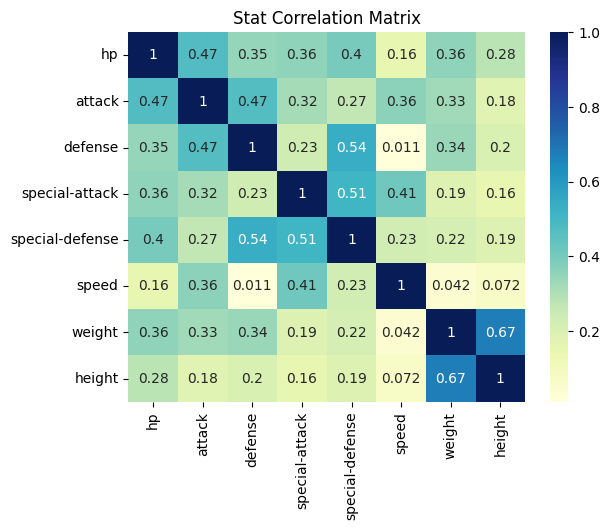

In [12]:
corr = df[['hp','attack','defense','special-attack','special-defense','speed','weight','height']].corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Stat Correlation Matrix')

<h1>Notes:</h1>
<h3>- Pokémon with only one type have type_2 blank, like Pikachu.</h3>
<h3>- HP and attack mostly fall in a middle range.</h3>
<h3>- Heavier Pokémon often hit harder.</h3>
<h3>- Defense and special-defense go hand-in-hand.</h3>